<a href="https://colab.research.google.com/github/SDGPTeamX/PregRed/blob/ml_Somaskaran/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(1398, 14)
(600, 14)
(300, 14)
(300, 14)
Display the datatype  of the test_dataset:  <class 'pandas.core.frame.DataFrame'>
train dataset : (1398, 14)
Test_dataset : (300, 14)
Validation_dataset : (300, 14)
Here is the summary of this model
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 13)                182       
_________________________________________________________________
activation_16 (Activation)   (None, 13)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_18 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 14        
Total params

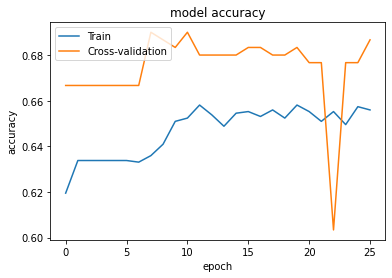

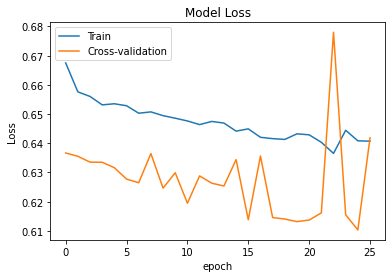

Train Split: 
44/44 [==============================] - 0s 2ms/step - loss: 0.6520 - accuracy: 0.6545
Accuracy :  0.65 
Evaluation Split: 
10/10 - 0s - loss: 0.6419 - accuracy: 0.6867
Accuracy :  0.69 
Test Split: 
10/10 - 0s - loss: 0.6460 - accuracy: 0.6833
Accuracy :  0.68 
[[0.6200915 ]
 [0.66292554]]


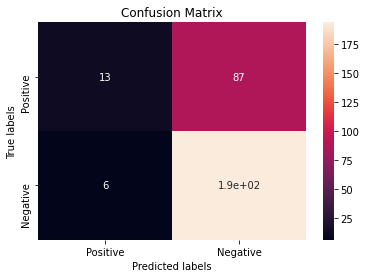

In [5]:
# for the operating system operations eg:- creating a folder
import os

# Tensorflow and Keras are two packages for creating neural network models.
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

# import NN layers and other components
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers

import matplotlib.pyplot as plt  # for plotting data and creating different charts
import numpy as np  # for math and arrays
import pandas as pd  # data from for the data
import seaborn as sns  # for plotting

tf.random.set_seed(13)  # to make sure the experiment is reproducible.
tf.debugging.set_log_device_placement(False)

all_ds = pd.read_csv('/content/drive/MyDrive/MachineLearndataset--30-1-2021/Weka_PregRed_binary_Dataset.csv')
all_ds

all_ds = all_ds.sample(frac=1)  # This will randomly shuffle the rows to make sure the data is not sorted.

# split the data into 70% train and 30% for test(later will divide the test to test and validate)
train_dataset, temp_test_dataset = train_test_split(all_ds, test_size=0.3)
print(train_dataset.shape)
print(temp_test_dataset.shape)

# split the test_dataset dataframe to 50% test and 50% validation.(this will divide the dataset into 70% train, 15% for test, 15% for validation)
test_dataset, valid_dataset = train_test_split(temp_test_dataset, test_size=0.5)
print(test_dataset.shape)
print(valid_dataset.shape)

print(f"Display the datatype  of the test_dataset:  {type(test_dataset)}")
print(f"train dataset : {train_dataset.shape}")
print(f"Test_dataset : {test_dataset.shape}")
print(f"Validation_dataset : {valid_dataset.shape}")

# Removing the label column from the dataset
train_labels = train_dataset.pop('Prediction')
test_labels = test_dataset.pop('Prediction')
valid_labels = valid_dataset.pop('Prediction')


# Build a neural network model

# We declared a function for creating a model
def build_model2_three_hidden_layers():
    # keras model object created from Sequential class. This will be the container that contains all layers.
    model = Sequential()

    # The model so far is empty. It can be constructed by add layers and compilation.
    # This Keras model with multiple hidden layers.

    # # Input layer with 13 Neurons
    model.add(Dense(13, input_shape=(train_dataset.shape[1],)))  # Input layer ==> input_shape must be explicitly designated
    model.add(Activation('relu'))
    model.add(Dense(13, Activation('relu')))  # Hidden_layer 1 ==> only output dimension should be designated
    model.add(Dense(13, Activation('relu')))  # Hidden_layer 1 ==> only output dimension should be designated
    model.add(Dense(1, Activation('sigmoid')))  # Hidden_layer 1 ==> only output dimension should be designated

    # model.add(Dense(1))

    # keras.layers.Flatten(input_shape=(13,)),
    # keras.layers.Dense(16, activation=tf.nn.relu),
    # keras.layers.Dense(16, activation=tf.nn.relu),
    # keras.layers.Dense(1, activation=tf.nn.sigmoid),

    learning_rate = 0.01
    optimizer = optimizers.SGD(learning_rate)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  optimizer=optimizer, metrics=['accuracy'])

    return model


model2 = build_model2_three_hidden_layers()
print('Here is the summary of this model')
model2.summary()

EPOCHS = 26
batch_size = 1

checkpoint_path = '/content/drive/MyDrive/MachineLearndataset--30-1-2021/prediction.ckpt'
ckpt_callback= tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                  monitor='val_loss',
                                                  save_best_only=True,
                                                  save_weights_only=True,
                                                  verbose=0)

history = model2.fit(
    train_dataset,
    train_labels,
    batch_size=batch_size,
    epochs=EPOCHS,
    verbose=1,
    shuffle=True,
    steps_per_epoch=int(train_dataset.shape[0] / batch_size),
    validation_data=(valid_dataset, valid_labels),
    callbacks=[ckpt_callback]
)

print('Summary of the results after each epoch : ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()



# #Dumping the model object
# import pickle
# pickle.dump(model, open('model.pkl','wb'))



# See how the training went by plotting the loss/Accuracy across epochs

from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-validation'], loc='upper left')
plt.show()

print('Train Split: ')
loss, accuracy = model2.evaluate(train_dataset, train_labels, verbose=1)
print('Accuracy : {:5.2f} '.format(accuracy))

print('Evaluation Split: ')
loss, accuracy = model2.evaluate(valid_dataset, valid_labels, verbose=2)
print("Accuracy : {:5.2f} ".format(accuracy))

print('Test Split: ')
loss, accuracy = model2.evaluate(test_dataset, test_labels, verbose=2)
print("Accuracy : {:5.2f} ".format(accuracy))

model2.load_weights(checkpoint_path)
a= np.array([[0.89899, 0.648649, 0, 0.414141, 0.5, 0.439344, 0, 0.333333, 0,0, 0, 0, 0],
             [0.444444, 0.378378, 0, 0.494949,0.3125, 0.272131, 0, 0.166667, 0, 1, 1, 0, 0]])
print(model2.predict(a))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

ax =plt.subplot()
predict_results = model2.predict(test_dataset)
predict_results = (predict_results > 0.5)

cm = confusion_matrix(test_labels, predict_results)

sns.heatmap(cm, annot=True, ax=ax);  # annot=True to annote cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Positive', 'Negative']);
ax.yaxis.set_ticklabels(['Positive', 'Negative']);
